In [1]:
%%capture
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import all required packages


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.74 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5771.7/8062.4 GB disk)


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

# Train the Model


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data="/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/data.yaml" epochs=100 imgsz=640

100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 284MB/s]
Ultralytics YOLOv8.2.74 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

# Seeing the metrics used in YOLO


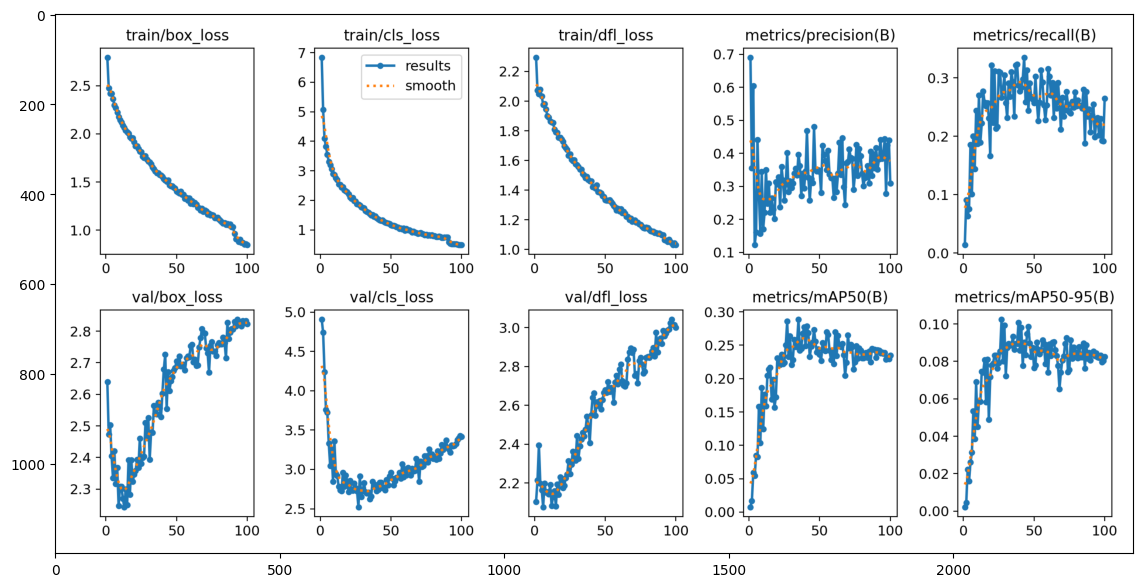

In [5]:
import matplotlib.pyplot as plt

from matplotlib import image
%matplotlib inline
metrics=image.imread('/kaggle/working/runs/detect/train/results.png')
plt.figure(figsize=(15,7))
plt.imshow(metrics)
plt.show()

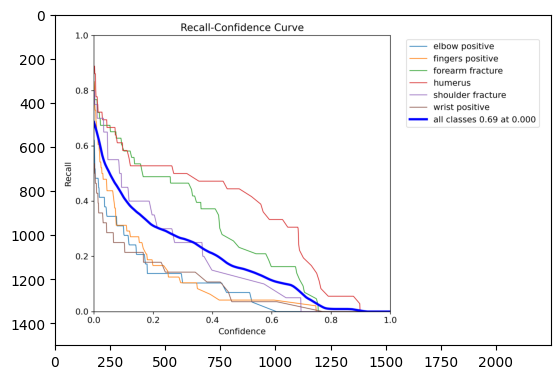

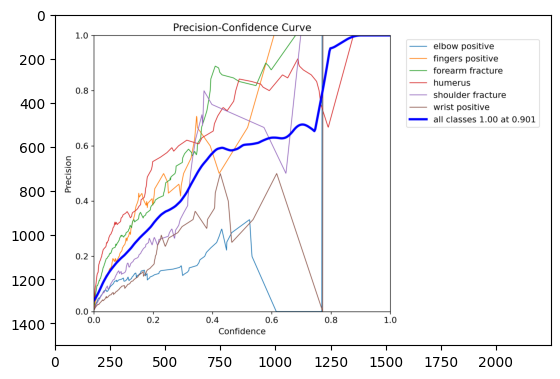

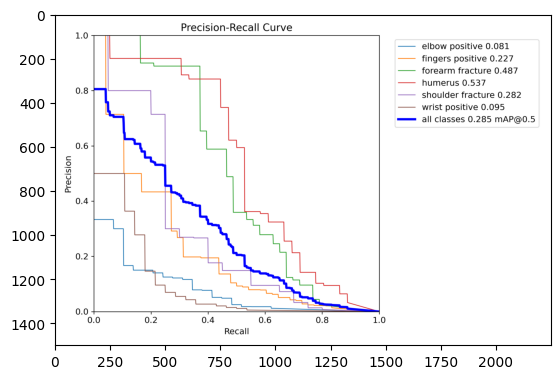

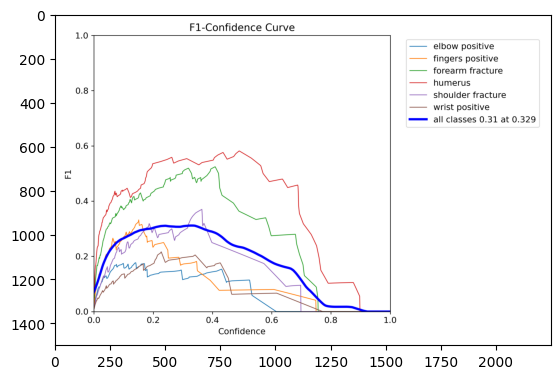

In [6]:
curves=['R_curve','P_curve','PR_curve','F1_curve']
for curve in curves:
    img=image.imread('/kaggle/working/runs/detect/train/'+curve+'.png')
    plt.imshow(img)
    plt.show()

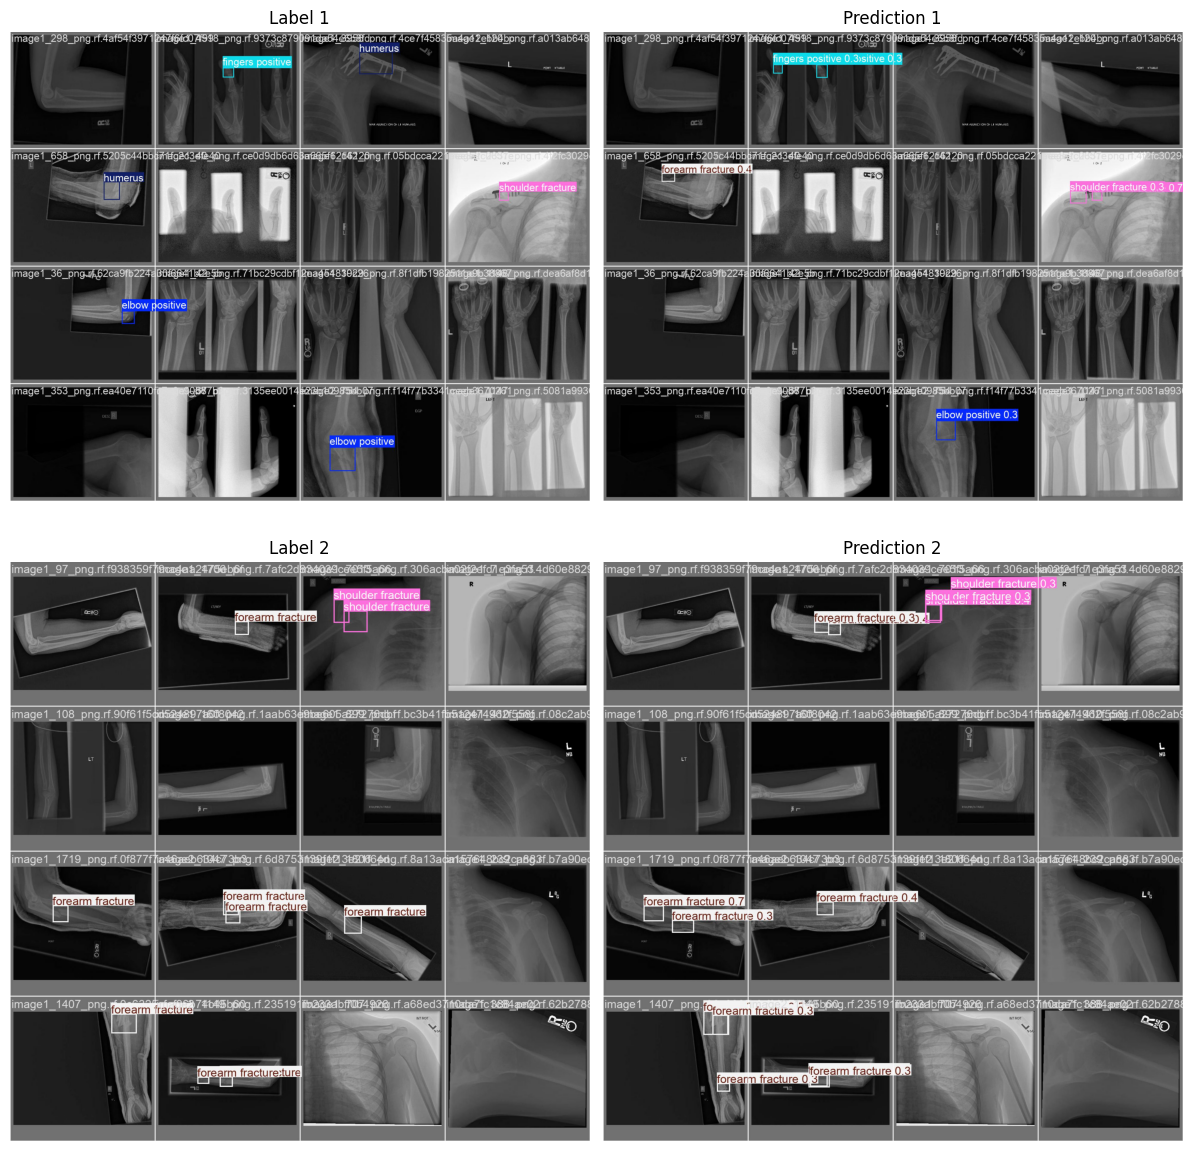

In [7]:
# Read images
label1 = plt.imread('/kaggle/working/runs/detect/train/val_batch1_labels.jpg')
label2 = plt.imread('/kaggle/working/runs/detect/train/val_batch2_labels.jpg')
pred1 = plt.imread('/kaggle/working/runs/detect/train/val_batch1_pred.jpg')
pred2 = plt.imread('/kaggle/working/runs/detect/train/val_batch2_pred.jpg')

# Create subplots with increased figure size
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

# Display images with titles and remove axis numbers
axarr[0, 0].imshow(label1)
axarr[0, 0].set_title('Label 1')
axarr[0, 0].axis('off')

axarr[0, 1].imshow(pred1)
axarr[0, 1].set_title('Prediction 1')
axarr[0, 1].axis('off')

axarr[1, 0].imshow(label2)
axarr[1, 0].set_title('Label 2')
axarr[1, 0].axis('off')

axarr[1, 1].imshow(pred2)
axarr[1, 1].set_title('Prediction 2')
axarr[1, 1].axis('off')

# Adjust layout with reduced padding
plt.tight_layout(pad=1)
plt.show()